In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Activation

In [2]:
#Generate synthetic noisy classification data
X=np.linspace(-3,3,500).reshape(-1,1)
y=(X[:,0]>0).astype(np.float32).reshape(-1,1)
y+=np.random.randn(*y.shape)*0.1

In [3]:
#Define model without Batch Normalization
model_no_bn=Sequential([
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [6]:
#Define model with Batch Normalization
model_with_bn=Sequential([
    Dense(32,input_shape=[1]),
    BatchNormalization(),
    Activation('relu'),
    Dense(1,activation='sigmoid')
])

c:\Users\ADARSH\.conda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#Compile both model
model_no_bn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_with_bn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
#train both model
history_no_bn=model_no_bn.fit(X,y,epochs=50,verbose=0,validation_split=0.2)
history_with_bn=model_with_bn.fit(X,y,epochs=50,verbose=0,validation_split=0.2)

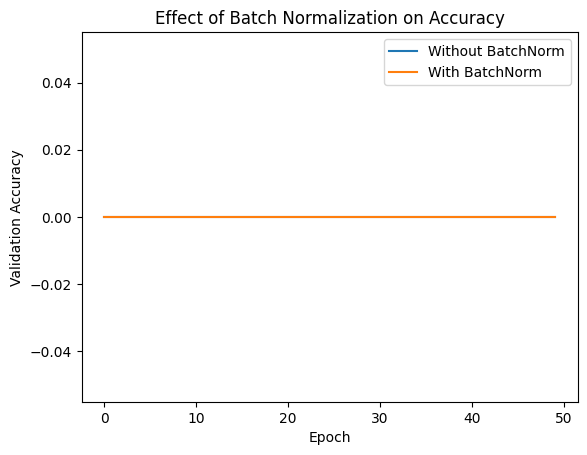

In [ ]:
# Plot validation accuracy comparison
plt.plot(history_no_bn.history['val_accuracy'], label='Without BatchNorm')     
plt.plot(history_with_bn.history['val_accuracy'], label='With BatchNorm')      
plt.title("Effect of Batch Normalization on Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()